# Download Datasets

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          24692        688  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1676         42  1.0              
darshanprabhu09/stock-prices-for                                      Stock prices of Amazon , Microsoft , Google, Apple   85KB  2023-05-16 15:17:16           1453         36  1.0              
fatihb/coffee-quality-data-cqi

In [ ]:
! kaggle competitions download -c kualitas-citra-mars-dari-kamera-themis

 99% 249M/252M [00:12<00:00, 26.9MB/s]
100% 252M/252M [00:12<00:00, 20.4MB/s]


In [ ]:
import os
import zipfile
local_zip = 'kualitas-citra-mars-dari-kamera-themis.zip'
target_extraction = './data/'
file_check = "kualitas-citra-mars-dari-kamera-themis"

try:
    if os.path.exists(os.path.join(target_extraction, file_check)):
        print("File Already Extracted")
    else:
        zip_ref = zipfile.ZipFile(local_zip, 'r')
        zip_ref.extractall(target_extraction)
        zip_ref.close()
#if data is already extracted it will instead print file already extracted
except FileNotFoundError:
    print('Zip File Not Found!')

# Import Library

In [ ]:
#Import pandas, numpy
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2
import glob
import imageio
from skimage import io, img_as_float
from skimage.feature import greycomatrix, greycoprops
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import imquality.brisque as brisque
import PIL.Image
from brisque import BRISQUE

# Check Datasets

In [ ]:
filepath='/content/data/kualitas_themis.csv'
df = pd.read_csv(filepath)
print(df)

            ID Kelas_Kualitas
0    V02147007              1
1    V02251006              1
2    V02327011              1
3    V02825007              1
4    V03001004              1
..         ...            ...
130  V02626006              7
131  V02663003              7
132  V02777006              7
133  V03113003              7
134  V03549003              ]

[135 rows x 2 columns]


In [ ]:
import csv

def read_csv_file(file_path):
    images = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)

        for row in csv_reader:
            images.append(row)

    return images

In [ ]:
file_path = '/content/data/kualitas_themis.csv'
images = read_csv_file(file_path)

print(images)
print(len(images))

[['V02147007', '1'], ['V02251006', '1'], ['V02327011', '1'], ['V02825007', '1'], ['V03001004', '1'], ['V03738044', '1'], ['V04111004', '1'], ['V04961004', '1'], ['V05335016', '1'], ['V05385017', '1'], ['V05472021', '1'], ['V05472022', '1'], ['V06384029', '1'], ['V06384030', '1'], ['V06384031', '1'], ['V07358012', '1'], ['V08020020', '1'], ['V08082017', '1'], ['V08862028', '1'], ['V08862029', '1'], ['V02602003', '2'], ['V04448004', '2'], ['V04462003', '2'], ['V05097011', '2'], ['V05123010', '2'], ['V05198009', '2'], ['V05222007', '2'], ['V05235007', '2'], ['V05247025', '2'], ['V05285014', '2'], ['V05322018', '2'], ['V05372014', '2'], ['V05548019', '2'], ['V07246020', '2'], ['V07907035', '2'], ['V07920021', '2'], ['V01315012', '3'], ['V01440007', '3'], ['V01452006', '3'], ['V01466006', '3'], ['V01503011', '3'], ['V01515010', '3'], ['V01515012', '3'], ['V01527010', '3'], ['V01591007', '3'], ['V01603003', '3'], ['V01616007', '3'], ['V01652010', '3'], ['V01653004', '3'], ['V01664007', '3'],

In [ ]:
dataset_large=[]
for a in range(0,len(images)):
  drive_loc = '/content/data/Themis-20230522T033938Z-001/Themis/' + images[a][0] + '.png'
  pic=mpimg.imread(drive_loc)
  dataset_large.append(pic)

In [ ]:
print(dataset_large)

[array([[0.5372549 , 0.50980395, 0.5372549 , ..., 0.50980395, 0.40784314,
        0.40784314],
       [0.48235294, 0.50980395, 0.50980395, ..., 0.42352942, 0.42352942,
        0.40784314],
       [0.5254902 , 0.46666667, 0.50980395, ..., 0.4392157 , 0.40784314,
        0.40784314],
       ...,
       [0.48235294, 0.48235294, 0.5372549 , ..., 0.40784314, 0.40784314,
        0.40784314],
       [0.4392157 , 0.4392157 , 0.42352942, ..., 0.42352942, 0.40784314,
        0.40784314],
       [0.48235294, 0.50980395, 0.50980395, ..., 0.4392157 , 0.42352942,
        0.48235294]], dtype=float32), array([[0.25490198, 0.25490198, 0.25490198, ..., 0.25490198, 0.25490198,
        0.45490196],
       [0.25490198, 0.25490198, 0.25490198, ..., 0.25490198, 0.25490198,
        0.45490196],
       [0.25490198, 0.25490198, 0.25490198, ..., 0.25490198, 0.25490198,
        0.45490196],
       ...,
       [0.34509805, 0.4627451 , 0.52156866, ..., 0.5764706 , 0.36078432,
        0.35686275],
       [0.25490198

In [ ]:
# Bagi data menjadi kotak berukuran 500x500 > boxsize
# Atur overlap untuk setiap kotak, semakin kecil, semakin banyak data yang terbentuk
# Running time semakin lama
# Beri waktu 3 menit untuk contoh

# Tempat untuk dataset berukuran 500x500
dataset_small = []
# Tempat untuk klasifikasi kelas setiap dataset kecil
dataset_class = []
# Karena sudah diiterasi, sekalian menghitung persentasi data yang kosong/ no data karena
# data keplanetan tidak berbentuk kotak tetapi mengikuti bujur/ lintang
dataset_class_perc = []

# Bisa dicoba mengubah. Boxsize=ukuran data, stride=ukuran overlap
# Semakin kecil overlap, semakin banyak data, semakin lama running
stride = 250
boxsize = 500

# Logikanya agak rumit, jadi di-run saja langsung
for z in range(0, len(dataset_large)):
    a = dataset_large[z].shape
    ratiox = np.int(a[0] / stride)
    ratioy = np.int(a[1] / stride)
    for x in range(1, ratiox + 1):
        for y in range(1, ratioy + 1):
            data_temp = dataset_large[z][(x - 1) * stride:(x - 1) * stride + boxsize, (y - 1) * stride:(y - 1) * stride + boxsize]

            # Karena ada area yang tidak berdata di gambar penuh
            # Jika dipotong, dapat menyebabkan tidak ada data sama sekali > tidak perlu dipakai
            if data_temp.max() != 0:
                dataset_small.append(data_temp)
                dataset_class.append(images[z][1])

                # Karena sudah diiterasi, sekalian saja menghitung persentase boxsize yang tidak ada datanya/ no data
                # Bisa dipakai menjadi fitur
                perc = dataset_large[z][dataset_large[z] < 1/255].size / dataset_large[z].size
                dataset_class_perc.append(perc)


<ipython-input-10-77295ee9394e>:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ratiox = np.int(a[0] / stride)
<ipython-input-10-77295ee9394e>:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for mor

In [ ]:
print("Dataset saya terdiri dari " + str(len(dataset_small)) + " sampel")
classes, counts = np.unique(dataset_class, return_counts=True)
for c, count in zip(classes, counts):
    print("Yaitu " + str(count) + " buah kualitas " + str(c))

Dataset saya terdiri dari 5987 sampel
Yaitu 487 buah kualitas 1
Yaitu 727 buah kualitas 2
Yaitu 664 buah kualitas 3
Yaitu 920 buah kualitas 4
Yaitu 944 buah kualitas 5
Yaitu 1238 buah kualitas 6
Yaitu 947 buah kualitas 7
Yaitu 60 buah kualitas ]


Berikut adalah contoh data THEMIS skala 1


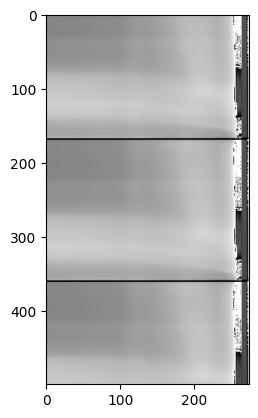

In [ ]:
#Nomor data ke-
number=100
displayed=dataset_small[number]
print("Berikut adalah contoh data THEMIS skala " +str(dataset_class[number]))

imgplot = plt.imshow(displayed,cmap="gray")
plt.show()

In [ ]:
import pandas as pd

feat = pd.DataFrame(index=np.arange(len(dataset_small)), columns=[0, 1, 2])

for x in range(0, len(dataset_small)):
    mean_val = np.mean(dataset_small[x])
    
    std_val = np.std(dataset_small[x])
    
    perc_val = dataset_class_perc[x]
    
    feat.loc[x, 0] = mean_val
    feat.loc[x, 1] = std_val
    feat.loc[x, 2] = perc_val


In [ ]:
print(feat)

             0         1         2
0     0.490723  0.030574       0.0
1     0.492886  0.031244       0.0
2      0.49769  0.033428       0.0
3     0.500527  0.036662       0.0
4     0.487692  0.031155       0.0
...        ...       ...       ...
5982  0.457616   0.22683  0.285565
5983  0.498343  0.180004  0.285565
5984  0.516739  0.130644  0.285565
5985  0.275407  0.266532  0.285565
5986  0.023815  0.111745  0.285565

[5987 rows x 3 columns]


In [ ]:
import numpy as np
from scipy import ndimage

for x in range(0, len(dataset_small)):
    mean_val = np.mean(dataset_small[x])
    
    std_val = np.std(dataset_small[x])
    
    feat.loc[x, 0] = mean_val
    feat.loc[x, 1] = std_val
    
    feat.loc[x, 2] = dataset_class_perc[x]


In [ ]:
print(mean_val)
print(std_val)

0.023814829
0.11174481


In [ ]:
import pandas as pd

X_themis = pd.DataFrame(feat)

y_themis = pd.DataFrame(dataset_class)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_themis, y_themis, test_size=0.2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10, n_estimators=10, max_features=10)


In [ ]:
rf.fit(X_train, y_train)


<ipython-input-28-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features=10, n_estimators=10)

In [ ]:
y_pred_themis = rf.predict(X_test)


In [ ]:
#Impor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred_themis)
print("Accuracy: {:.2f}%".format(accuracy * 100))

confusion_matrix = confusion_matrix(y_test, y_pred_themis)
print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred_themis)
print("Classification Report:")
print(classification_report)


Accuracy: 89.98%
Confusion Matrix:
[[100   0   0   0   0   0   0   0]
 [  0 133   0   0   0   0   0   0]
 [  0   0 115   0   0  14   0   0]
 [  0   0   0 180   0   0   9   0]
 [  0   0   0   0 185   0   0   0]
 [  0  12   0   0  34 181  13   0]
 [  0   0   3   0  11  24 168   0]
 [  0   0   0   0   0   0   0  16]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       100
           2       0.92      1.00      0.96       133
           3       0.97      0.89      0.93       129
           4       1.00      0.95      0.98       189
           5       0.80      1.00      0.89       185
           6       0.83      0.75      0.79       240
           7       0.88      0.82      0.85       206
           ]       1.00      1.00      1.00        16

    accuracy                           0.90      1198
   macro avg       0.93      0.93      0.92      1198
weighted avg       0.90      0.90      0.90      1198



In [ ]:
def nss_feature(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = greycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    return np.array([
        greycoprops(glcm, 'contrast')[0, 0],
        greycoprops(glcm, 'dissimilarity')[0, 0],
        greycoprops(glcm, 'homogeneity')[0, 0],
        greycoprops(glcm, 'energy')[0, 0],
        greycoprops(glcm, 'correlation')[0, 0]
    ])


In [ ]:
image_files = glob.glob('/content/data/Themis-20230522T033938Z-001/Themis/*.png')

features = []
labels = []

for image_file in image_files:
    label = image_file.split('_')[0].split('/')[-1].replace('.png','')
    labels.append(label)

for image_file in image_files:
    image = cv2.imread(image_file)
    feature = nss_feature(image)

    features.append(feature)

features = np.array(features)
labels = np.array(labels)

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

In [ ]:
contrast = [feature[0] for feature in features]
KC = pd.DataFrame({'ID': labels, 'Contrast': contrast})

In [ ]:
df = pd.read_csv('/content/data/kualitas_themis.csv')
df.tail()

,ID,Kelas_Kualitas
130,V02626006,7
131,V02663003,7
132,V02777006,7
133,V03113003,7
134,V03549003,]


In [ ]:
KC = KC.sort_values(by='ID')
df = df.sort_values(by='ID')

In [ ]:
KC['Kelas Kualitas']=df['Kelas_Kualitas']

In [ ]:
X_train=KC['Contrast'].values.reshape(-1,1)
y_train=KC['Kelas Kualitas'].values

In [ ]:
model = RandomForestClassifier(max_depth=10, n_estimators=10, max_features=10)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=10, n_estimators=10)

In [ ]:
image_files_tst = glob.glob('/content/data/THEMIS-data-test/THEMIS-data-test/*.png')

features_tst = []
labels_tst = []
for image_file in image_files_tst:
    image = cv2.imread(image_file)
    feature = nss_feature(image)

    features_tst.append(feature)
    label = image_file.split('_')[0].split('/')[-1].replace('.png','')
    labels_tst.append(label)

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

In [ ]:
contrast_tst=[]
for i in range(0,len(features_tst)):
  contrast_tst.append(features_tst[i][0])
KCTst=pd.DataFrame({'ID': labels_tst,
                    'Contrast': contrast_tst})

In [ ]:
KCTst=KCTst.sort_values(by='ID')
X_test=KCTst['Contrast'].values.reshape(-1,1)
y_pred = model.predict(X_test)

In [ ]:
KCTst['Prediksi']=y_pred
KCTst

,ID,Contrast,Prediksi
18,V01201002,32.836278,7
1,V01211001,33.304976,2
24,V01215003,76.091337,7
8,V01226003,23.665875,7
6,V01231001,84.852301,7
27,V01237004,76.447323,7
20,V01247003,32.701610,7
11,V01250009,152.746008,3
10,V01252008,69.622076,1
21,V01254006,130.716138,7


In [ ]:
output_df = pd.DataFrame({'ID': labels_tst, 'Prediksi': y_pred})

output_df.to_csv('output.csv', index=False)